<a href="https://colab.research.google.com/github/8zali9/DeepLearning-PyTorch/blob/main/courseNotebooks/PyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **ML Model**
*What we are doing?*
1. (a) we set random values of weight (how much the connection of input layers to a single neuron influences) and bias.
2. (b) we then create a sample dataset of random values and then applied a linear regression formula.
3. (c) we then split the data into training and testing sets in the ratio of 8:2.
4. (d) we then create a function to plot the sample data to visualize
5. (e) we then create a LinearRegressionModel (explained there in detail)

### (a).

we set random values of weight (how much the connection of input layers to a single neuron influences) and bias.

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.2.1+cu121'

### (b)

we then create a sample dataset of random values and then applied a linear regression formula.

In [2]:
# (a)
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

In [3]:
print(f"X tensor:\n{X[:10]}\nwith the length: {len(X)}\n")
print(f"y vector:\n{y[:10]}\nwith the length: {len(y)}")

X tensor:
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
with the length: 50

y vector:
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
with the length: 50


### (c)

we then split the data into training and testing sets in the ratio of 8:2.

In [4]:
train_split = int(0.8 * len(X))
train_X, train_y = X[:train_split], y[:train_split]
test_X, test_y = X[train_split:], y[train_split:]


plotting a scatter plot through matplotlib

### (d)

we then create a function to plot the sample data to visualize

In [5]:
def plot_scatter (
    train_data = train_X,
    train_labels = train_y,
    test_data = test_X,
    test_labels = test_y,
    predictions = None
    ) :
      plt.figure(figsize=(10, 7))

      plt.scatter(train_data, train_labels, c="b", s=5, label = "Training data")
      plt.scatter(test_data, test_labels, c="g", s=5, label = "Test data")

      if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=5, label = "Predictions")

      plt.legend(prop={"size": 14})

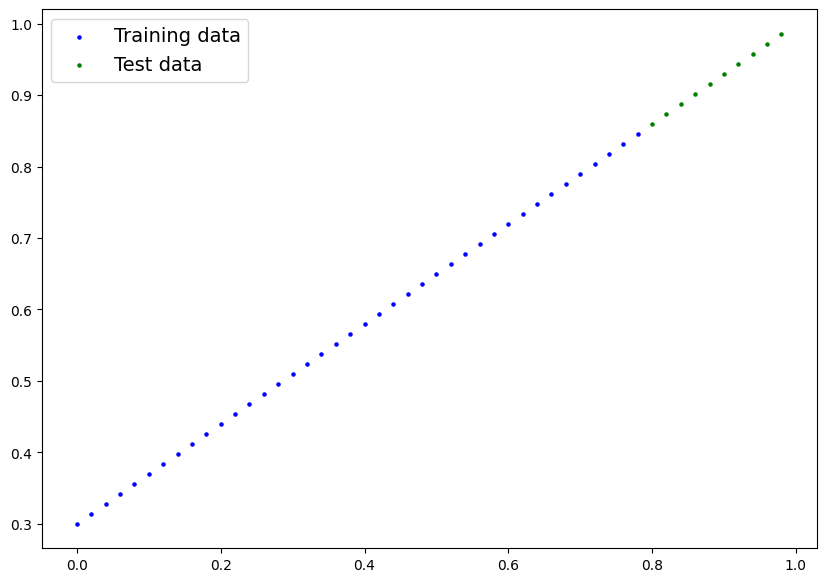

In [6]:
plot_scatter()

### (e)

we then create a LinearRegressionModel (explained there in detail)

*Details:*

`LinearRegressionModel` class  inherits `nn.Module` class

`def __init__(self)` : is a constructor

`super().__init__()` : calls the constructor of the parent class `nn.Module`. It ensures that the parent's class's methods are initialized first, before the child class initializes. If we hadn't done this, we were assuming that the methods are accessible from the parent class, although they are not even initialized.

The `self.weights` and the `self.bias` are initialized with random numbers. Afterwards, we have adjusted these values to represent or replicate those values which were set in step (a). This is done by a **gradient descent** approach (we find how can we make the cost function spit a lower and lower value; essentially saying finding the minima of the function).

```
def forward (self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias
```
Above code which has the forward function is a must for every class that inherits nn.Module class. This is because this class which inherits, acts as a hidden layer in the neural network, so it takes some input, and *forwards* it onto the next layer.


In [7]:
class LinearRegressionModel (nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(
        torch.randn(
            1,
            requires_grad= True,
            dtype= torch.float
        )
      )

    self.bias = nn.Parameter(
        torch.randn(
            1,
            requires_grad=True,
            dtype = torch.float
        )
    )

  def forward (self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias